In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("C:\\Users\\ishat\\Downloads\\archive (1)\\Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
for i in df:
    if(df[i].dtype==object):
        print(df[i].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [8]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes':1,'no':0}).astype(int)

C:\Users\ishat\AppData\Local\Temp\ipykernel_21080\3581847677.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes':1,'no':0}).astype(int)


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,unfurnished


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
lcoder = LabelEncoder()
df['furnishingstatus'] = lcoder.fit_transform(df['furnishingstatus'])

In [13]:
df['furnishingstatus'].value_counts()

furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [15]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2


In [16]:
# 2 -> unfurnished
# 1 -> semifurnished
# 0 -> furnished

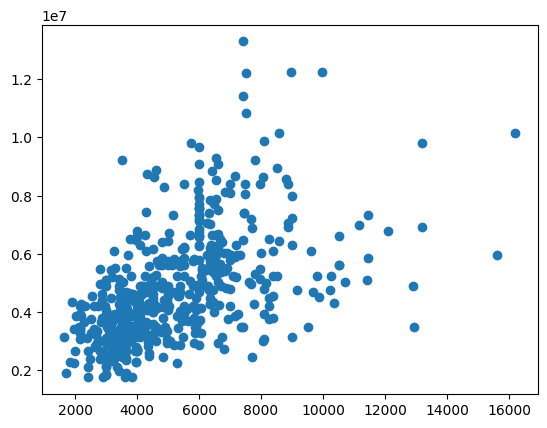

In [17]:
plt.scatter(df['area'],df['price'])

<Axes: xlabel='area', ylabel='price'>

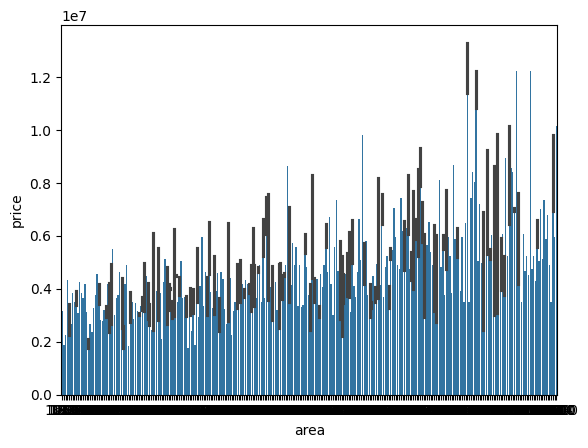

In [18]:
sns.barplot(data=df,x='area',y='price')

<Axes: xlabel='area', ylabel='price'>

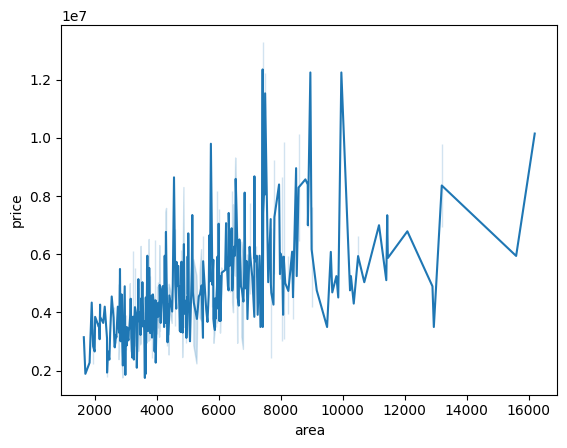

In [19]:
sns.lineplot(data = df,x='area',y='price')

<Axes: xlabel='area'>

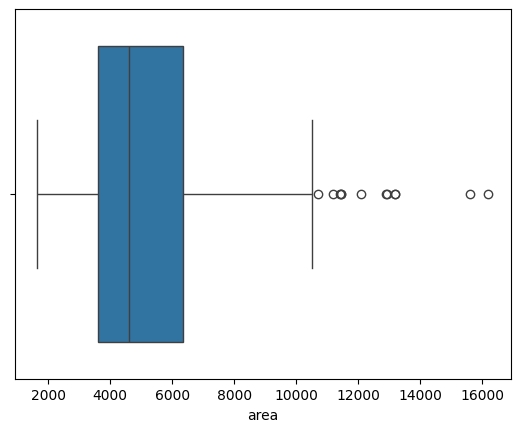

In [20]:
sns.boxplot(data = df, x=df['area'])

<Axes: xlabel='price'>

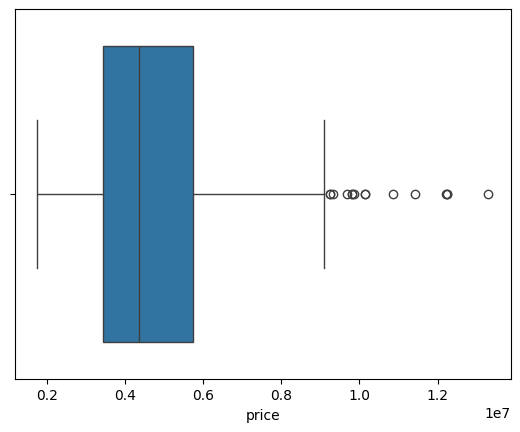

In [21]:
sns.boxplot(data = df, x = df['price'])

<Axes: xlabel='parking', ylabel='price'>

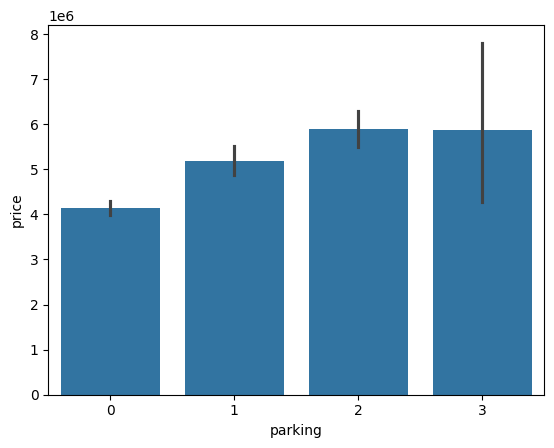

In [22]:
sns.barplot(data = df, x = 'parking', y = 'price')

<Axes: xlabel='mainroad', ylabel='price'>

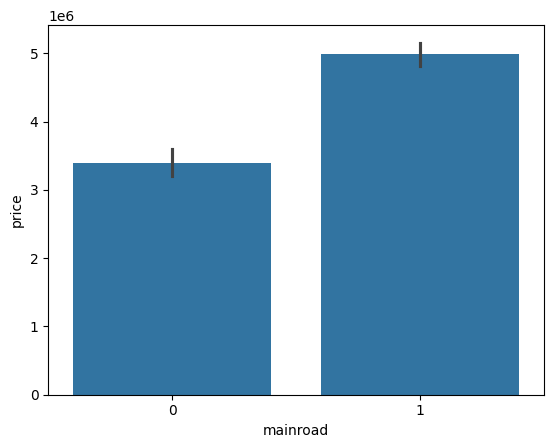

In [23]:
sns.barplot(data = df, x= 'mainroad', y = 'price')

<Axes: xlabel='parking', ylabel='price'>

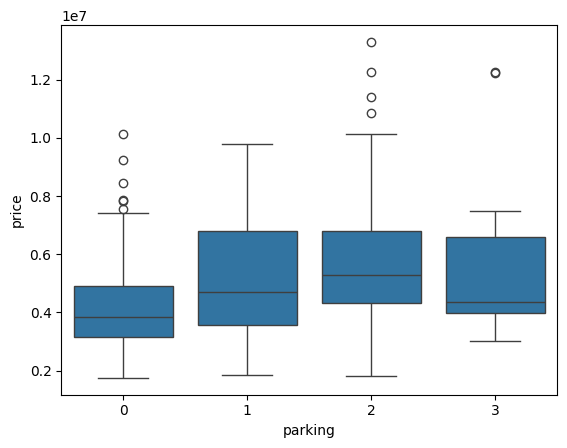

In [24]:
sns.boxplot(data = df,x = df['parking'], y= df['price'])

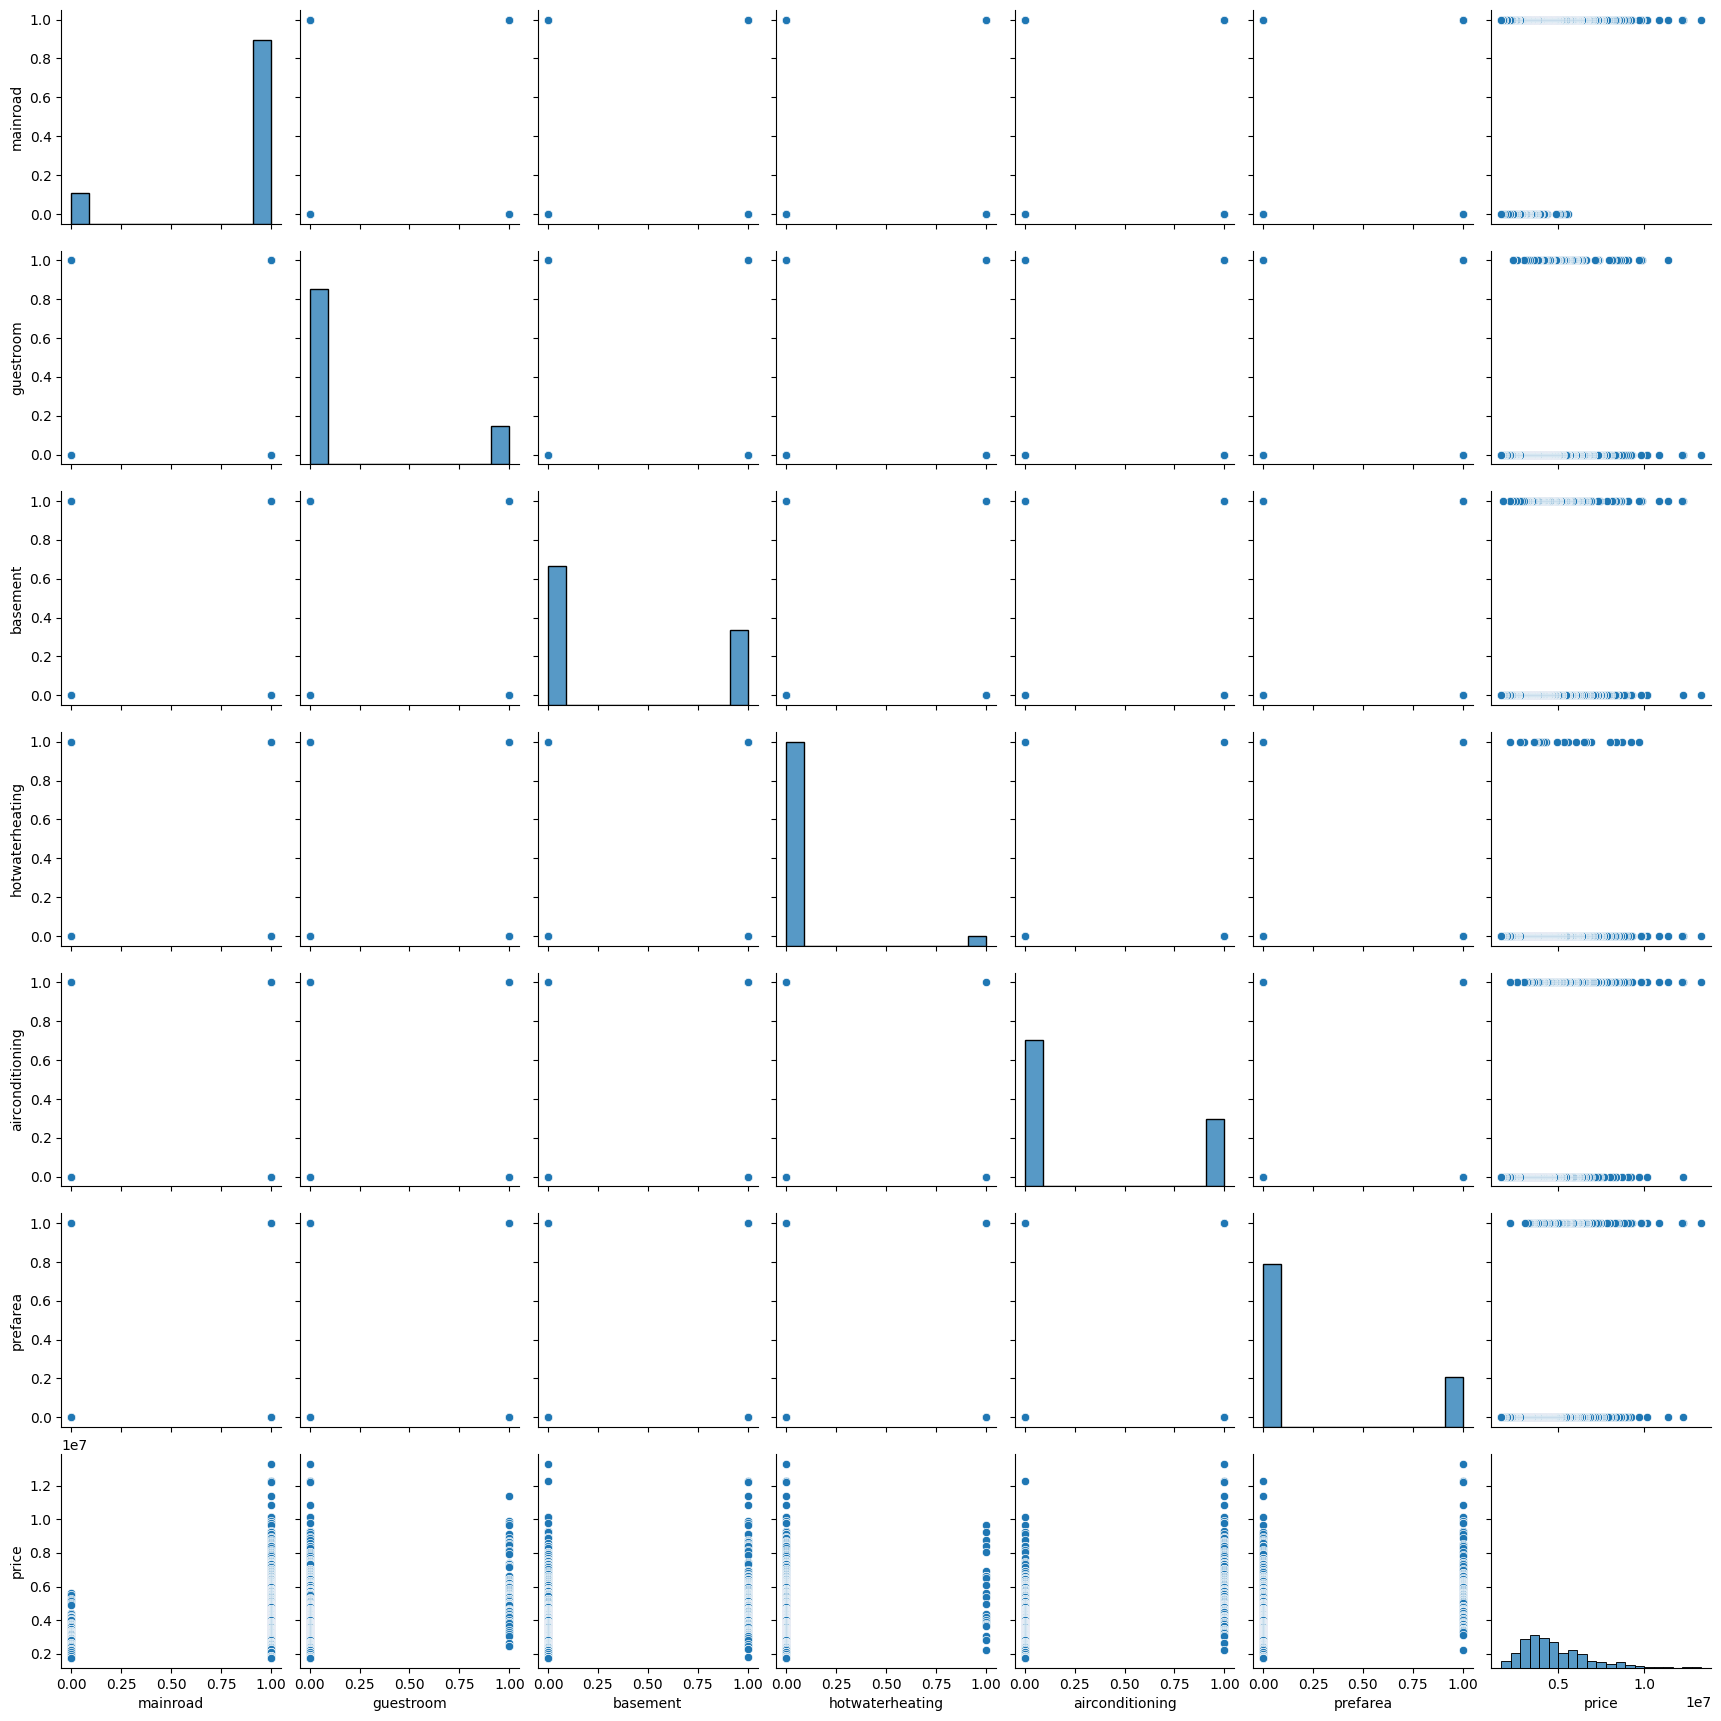

In [25]:
sns.pairplot(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'price']])
plt.show()


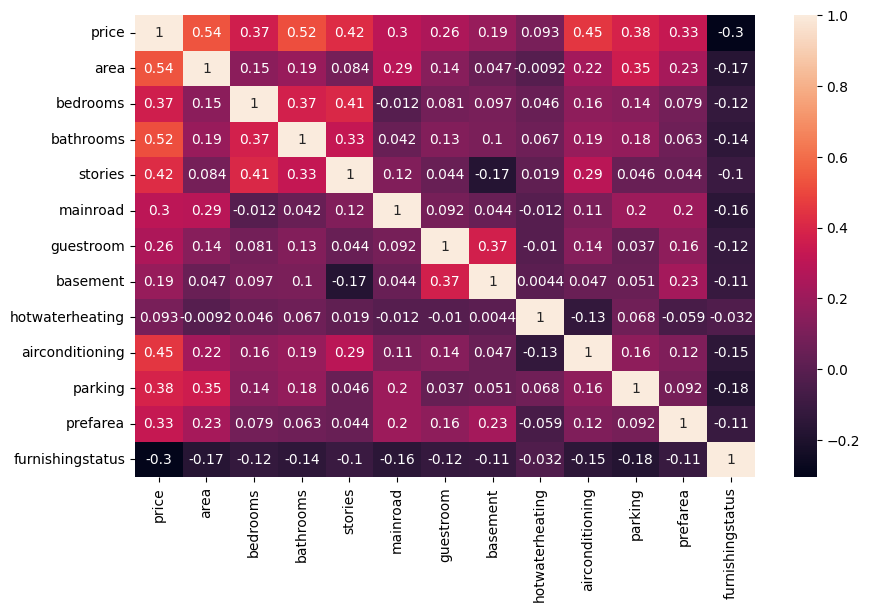

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True)
plt.show()

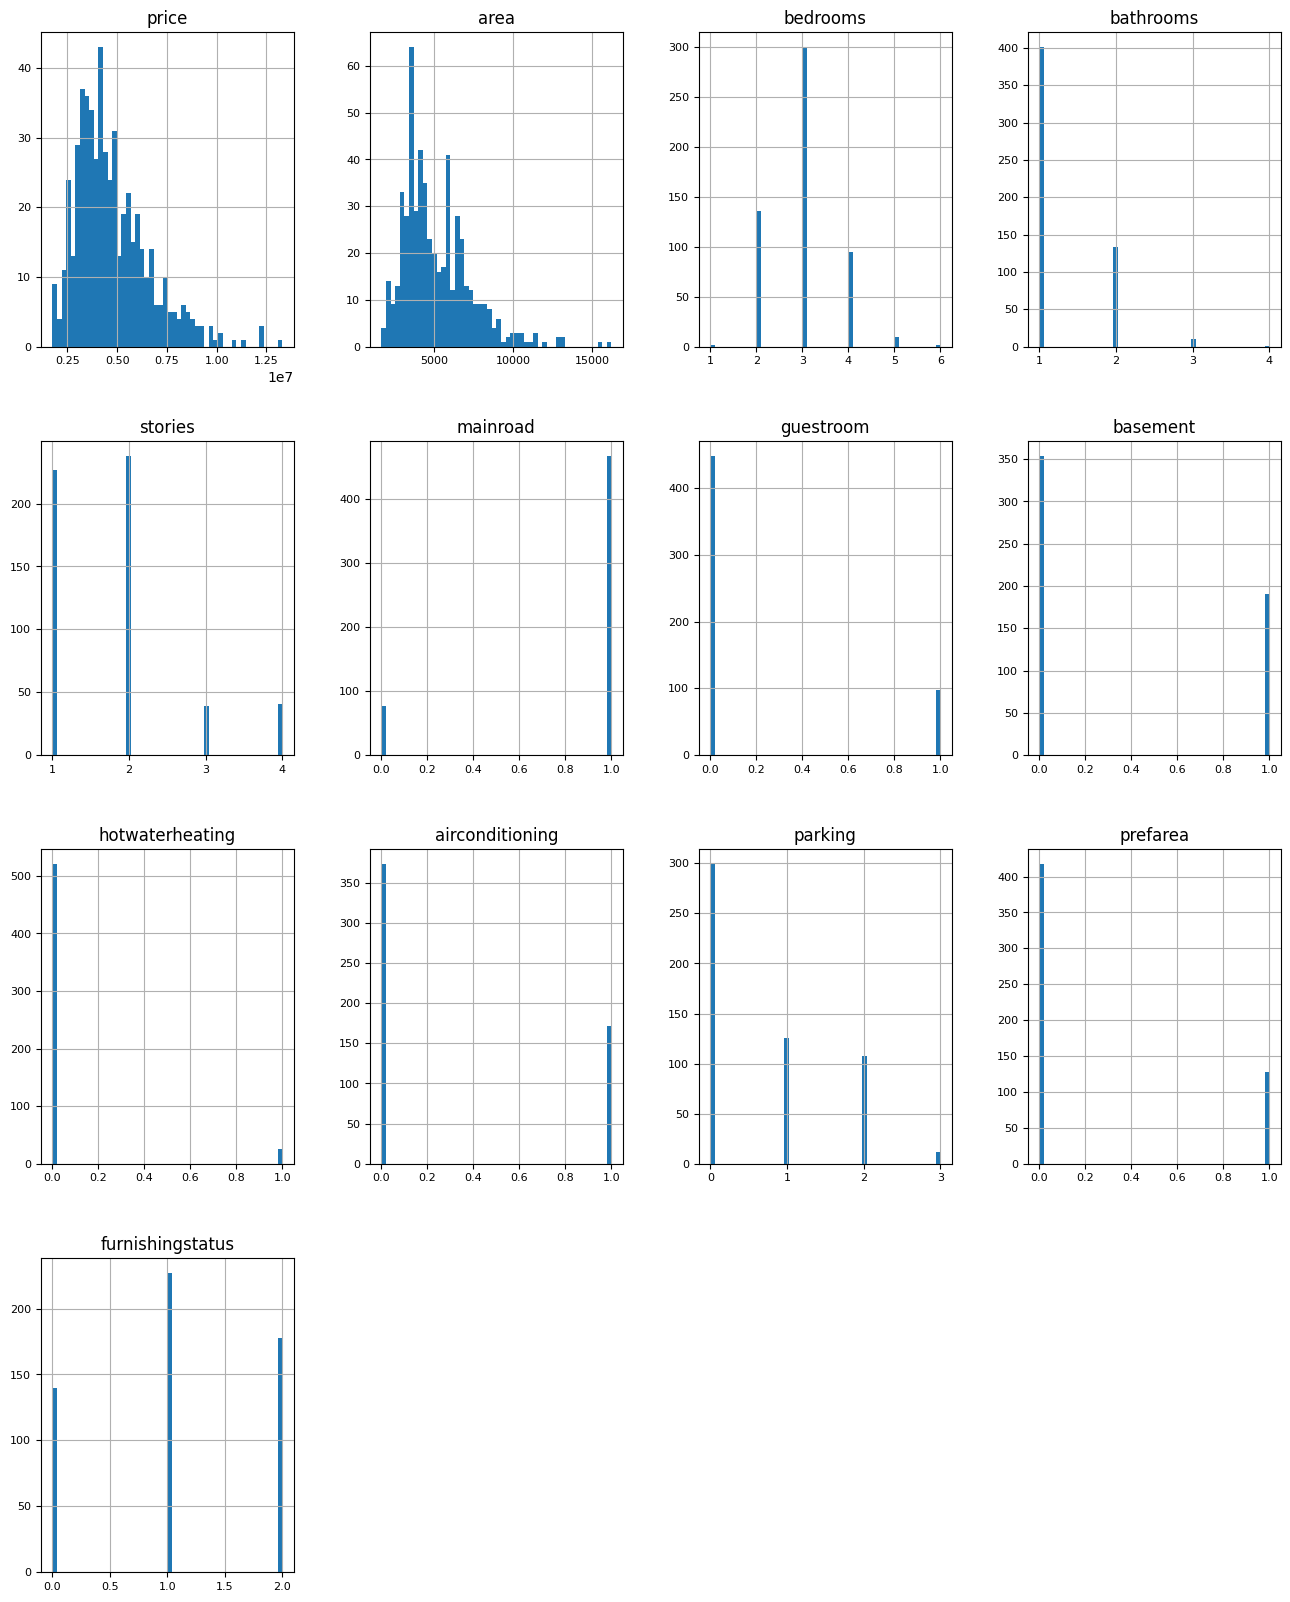

In [27]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<Axes: xlabel='furnishingstatus', ylabel='price'>

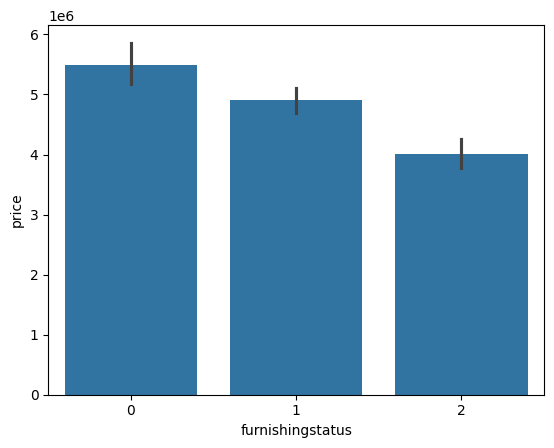

In [28]:
sns.barplot(data = df, x= 'furnishingstatus',y = 'price')

In [29]:
X = df.drop(['price'],axis = 1)
y = df['price']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
training_data_prediction = model.predict(X_train)
testing_data_prediction = model.predict(X_test)

Text(0, 0.5, 'Predicted price')

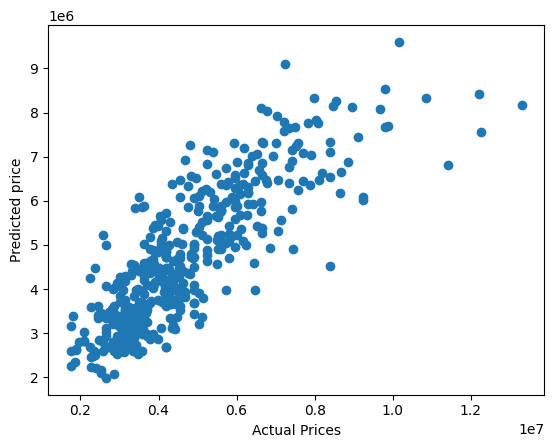

In [33]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted price")

Text(0, 0.5, 'Predicted price')

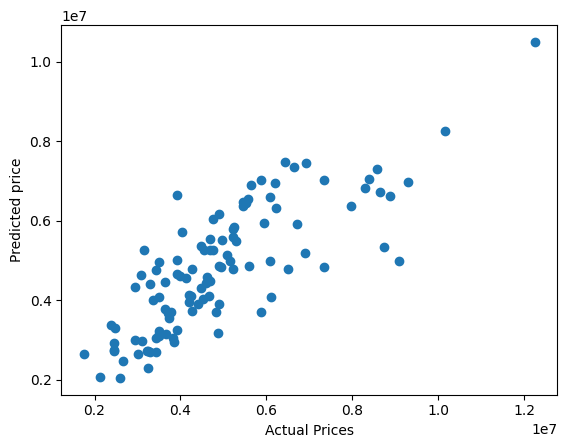

In [34]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted price")

In [35]:
print(y_train.shape,training_data_prediction.shape)

(436,) (436,)


In [36]:
print(type(y_train))
print(type(training_data_prediction))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [37]:
y_train = np.array(y_train)
training_data_prediction = np.array(training_data_prediction)

In [38]:
print(type(y_train))
print(type(training_data_prediction))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [39]:
print(y_train.ndim,training_data_prediction.ndim)

1 1


In [41]:
from sklearn import metrics

In [42]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6884454072877346
Mean Absolute Error :  753162.9161507755


In [43]:
score_1_test = metrics.r2_score(y_test, testing_data_prediction)

# Mean Absolute Error
score_2_test = metrics.mean_absolute_error(y_test, testing_data_prediction)

print("R squared error : ", score_1_test)
print('Mean Absolute Error : ', score_2_test)

R squared error :  0.6361990100766217
Mean Absolute Error :  865891.4864066527


In [44]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [97]:
import joblib
joblib.dump(model,'house_price_model.pkl')

['house_price_model.pkl']

In [45]:
df['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64